# ***卷积神经网络基础***

# 1. 机器视觉

① 机器视觉（Computer Vision）是深度学习应用的主要方向之一。一般的CV问题包括以下三类：
 - Image Classification
 - Object detection
 - Neural Style Transfer
 
② 下图展示了一个神经风格转换（Neural Style Transfer）的例子：

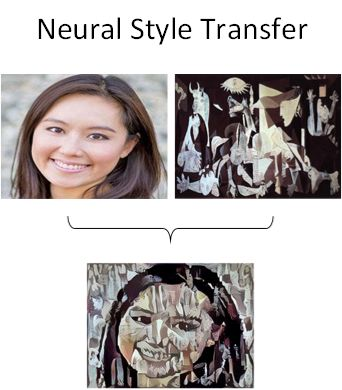

① 使用传统神经网络处理机器视觉的一个主要问题是输入层维度很大。例如一张64x64x3的图片，神经网络输入层的维度为12288。

② 如果图片尺寸较大，例如一张1000x1000x3的图片，神经网络输入层的维度将达到3百万，使得网络权重W非常庞大。

③ 这样会造成两个后果，一是神经网络结构复杂，数据量相对不够，容易出现过拟合；二是所需内存、计算量较大。解决这一问题的方法就是使用卷积神经网络（CNN）。

# 2. 边缘检测

① 对于CV问题，我们在之前的笔记中介绍过，神经网络由浅层到深层，分别可以检测出图片的边缘特征 、局部特征（例如眼睛、鼻子等）、整体面部轮廓。这一小节我们将介绍如何检测图片的边缘。

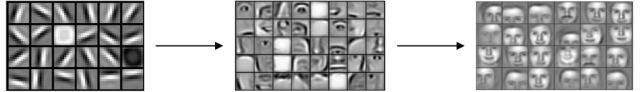

② 最常检测的图片边缘有两类：一是垂直边缘（vertical edges），二是水平边缘（horizontal edges）。

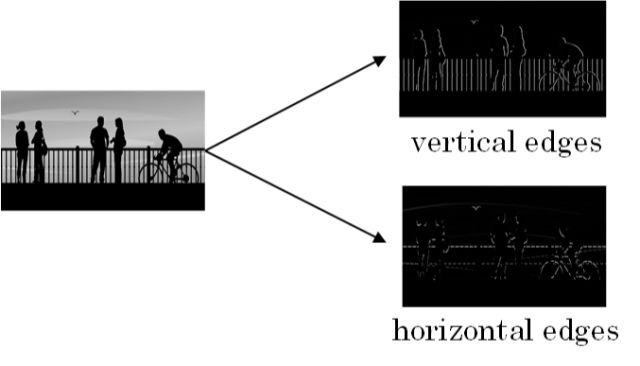

③ 图片的边缘检测可以通过与相应滤波器进行卷积来实现。以垂直边缘检测为例，原始图片尺寸为6x6，滤波器filter尺寸为3x3，卷积后的图片尺寸为4x4，得到结果如下（下图只显示了卷积后的第一个值和最后一个值）：

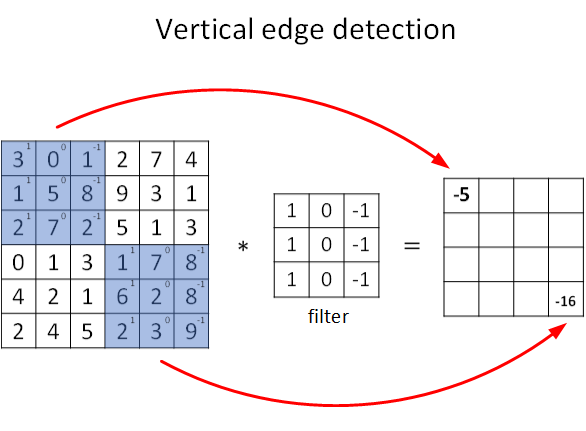

④ 顺便提一下，∗表示卷积操作。python中，卷积用conv_forward()表示；tensorflow中，卷积用tf.nn.conv2d()表示；keras中，卷积用Conv2D()表示。

⑤ Vertical edge detection能够检测图片的垂直方向边缘。下图对应一个垂直边缘检测的例子：

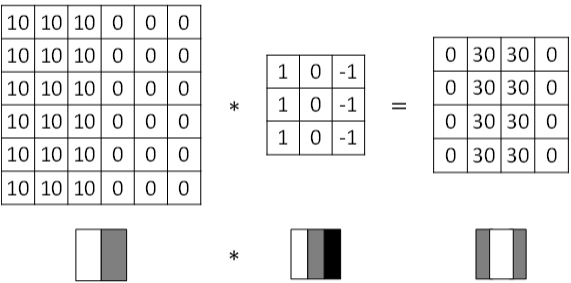

① 图片边缘有两种渐变方式，一种是由明变暗，另一种是由暗变明。

② 以垂直边缘检测为例，下图展示了两种方式的区别。实际应用中，这两种渐变方式并不影响边缘检测结果，可以对输出图片取绝对值操作，得到同样的结果。

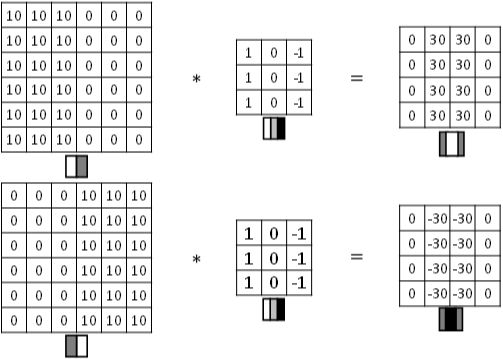

③ 垂直边缘检测和水平边缘检测的滤波器算子如下所示：

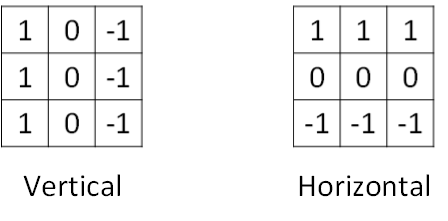

④ 下图展示一个水平边缘检测的例子：

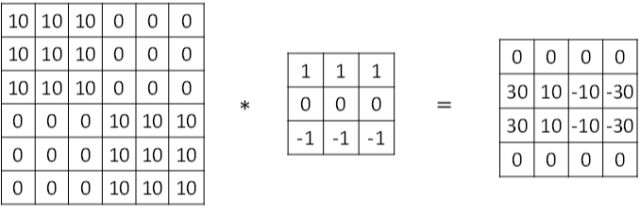

⑤ 除了上面提到的这种简单的Vertical、Horizontal滤波器之外，还有其它常用的filters，例如Sobel filter和Scharr filter。这两种滤波器的特点是增加图片中心区域的权重。

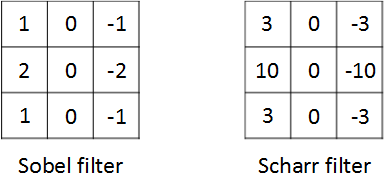

⑥ 上图展示的是垂直边缘检测算子，水平边缘检测算子只需将上图顺时针翻转90度即可。

① 在深度学习中，如果我们想检测图片的各种边缘特征，而不仅限于垂直边缘和水平边缘，那么filter的数值一般需要通过模型训练得到，类似于标准神经网络中的权重W一样由梯度下降算法反复迭代求得。

② CNN的主要目的就是计算出这些filter的数值。确定得到了这些filter后，CNN浅层网络也就实现了对图片所有边缘特征的检测。

# 3. Padding

① 按照我们上面讲的图片卷积，如果原始图片尺寸为n x n，filter尺寸为f x f，则卷积后的图片尺寸为(n-f+1) x (n-f+1)，注意f一般为奇数。这样会带来两个问题：

 - 卷积运算后，输出图片尺寸缩小
 - 原始图片边缘信息对输出贡献得少，输出图片丢失边缘信息
 
② 为了解决图片缩小的问题，可以使用padding方法，即把原始图片尺寸进行扩展，扩展区域补零，用p来表示每个方向扩展的宽度。

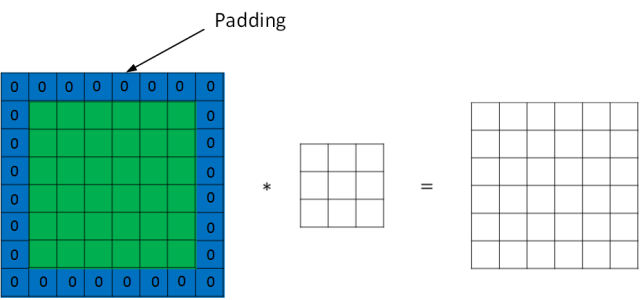

③ 经过padding之后，原始图片尺寸为(n+2p) x (n+2p)，filter尺寸为f x f，则卷积后的图片尺寸为(n+2p-f+1) x (n+2p-f+1)。

④ 若要保证卷积前后图片尺寸不变，则p应满足：

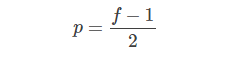

⑤ 没有padding操作，p=0，我们称之为“Valid convolutions”；有padding操作，p=(f−1)/2，我们称之为“Same convolutions”。

# 4. stride

① Stride表示filter在原图片中水平方向和垂直方向每次的步进长度。之前我们默认stride=1。若stride=2，则表示filter每次步进长度为2，即隔一点移动一次。

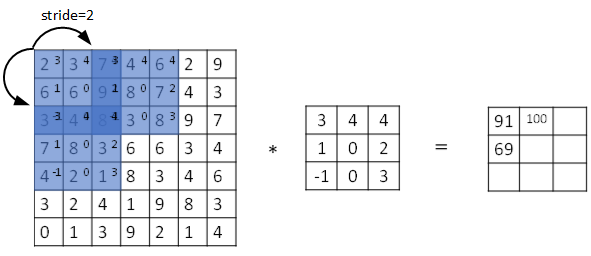

② 我们用s表示stride长度，p表示padding长度，如果原始图片尺寸为n x n，filter尺寸为f x f，则卷积后的图片尺寸为：

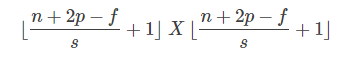

③ 上式中，⌊⋯⌋表示向下取整。

① 值得一提的是，相关系数（cross-correlations）与卷积（convolutions）之间是有区别的。

② 实际上，真正的卷积运算会先将filter绕其中心旋转180度，然后再将旋转后的filter在原始图片上进行滑动计算。filter旋转如下所示：

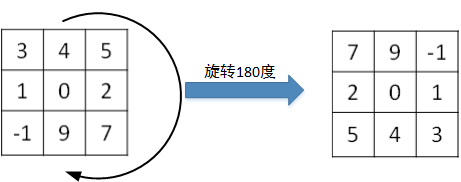

③ 比较而言，相关系数的计算过程则不会对filter进行旋转，而是直接在原始图片上进行滑动计算。

① 其实，目前为止我们介绍的CNN卷积实际上计算的是相关系数，而不是数学意义上的卷积。

② 但是，为了简化计算，我们一般把CNN中的这种“相关系数”就称作卷积运算。

③ 之所以可以这么等效，是因为滤波器算子一般是水平或垂直对称的，180度旋转影响不大；而且最终滤波器算子需要通过CNN网络梯度下降算法计算得到，旋转部分可以看作是包含在CNN模型算法中。

④ 总的来说，忽略旋转运算可以大大提高CNN网络运算速度，而且不影响模型性能。

⑤ 卷积运算服从分配律：

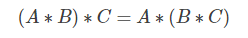

# 5. 多通道卷积

① 对于3通道的RGB图片，其对应的滤波器算子同样也是3通道的。例如一个图片是6 x 6 x 3，分别表示图片的高度（height）、宽度（weight）和通道（channel）。

② 3通道图片的卷积运算与单通道图片的卷积运算基本一致。过程是将每个单通道（R，G，B）与对应的filter进行卷积运算求和，然后再将3通道的和相加，得到输出图片的一个像素值。

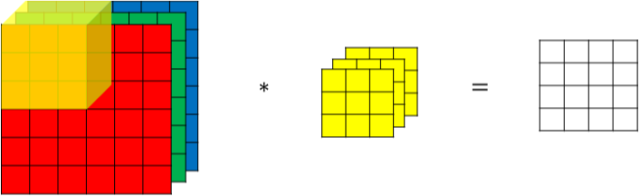

③ 不同通道的滤波算子可以不相同。例如R通道filter实现垂直边缘检测，G和B通道不进行边缘检测，全部置零，或者将R，G，B三通道filter全部设置为水平边缘检测。

④ 为了进行多个卷积运算，实现更多边缘检测，可以增加更多的滤波器组。例如设置第一个滤波器组实现垂直边缘检测，第二个滤波器组实现水平边缘检测。这样，不同滤波器组卷积得到不同的输出，个数由滤波器组决定。

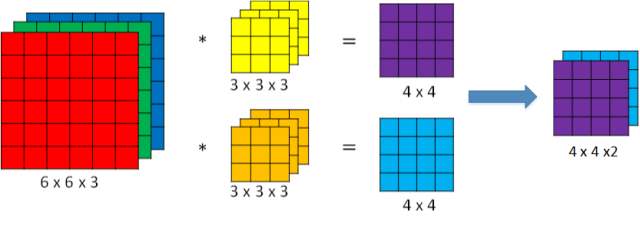

⑤ 若输入图片的尺寸为n x n x nc，filter尺寸为f x f x nc，则卷积后的图片尺寸为(n-f+1) x (n-f+1) x nc′。其中，nc为图片通道数目，nc′为滤波器组个数。

# 6. 单层卷积

① 卷积神经网络的单层结构如下所示：

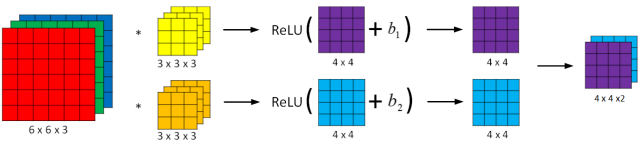

② 相比之前的卷积过程，CNN的单层结构多了激活函数ReLU和偏移量b。整个过程与标准的神经网络单层结构非常类似：

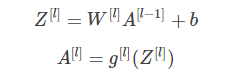

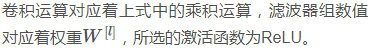

③ 我们来计算一下上图中参数的数目：每个滤波器组有3x3x3=27个参数，还有1个偏移量b，则每个滤波器组有27+1=28个参数，两个滤波器组总共包含28x2=56个参数。

④ 我们发现，选定滤波器组后，参数数目与输入图片尺寸无关。所以，就不存在由于图片尺寸过大，造成参数过多的情况。例如一张1000x1000x3的图片，标准神经网络输入层的维度将达到3百万，而在CNN中，参数数目只由滤波器组决定，数目相对来说要少得多，这是CNN的优势之一。

⑤ 最后，我们总结一下CNN单层结构的所有标记符号，设层数为l。

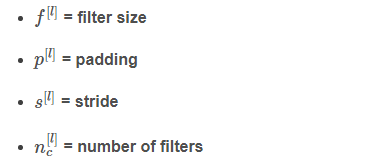

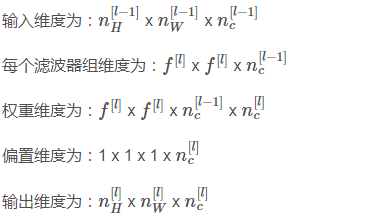

⑥ 其中：

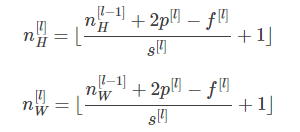

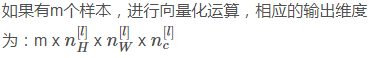

# 7. 简单CNN模型

① 下面介绍一个简单的CNN网络模型：

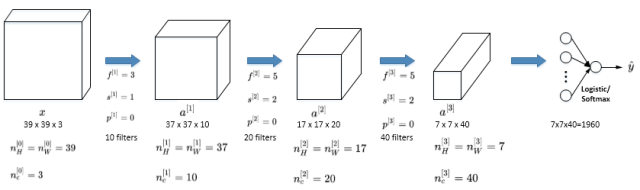

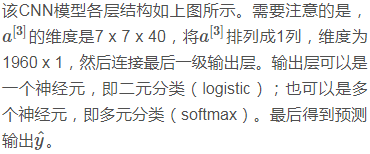

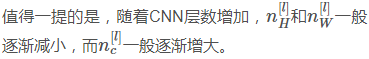

② CNN有三种类型的layer：

 - Convolution层（CONV）
 - Pooling层（POOL）
 - Fully connected层（FC）

③ CONV最为常见也最重要，关于POOL和FC我们之后再介绍。

# 8. Pooling层

① Pooling layers是CNN中用来减小尺寸，提高运算速度的，同样能减小noise影响，让各特征更具有健壮性。

② Pooling layers的做法比convolution layers简单许多，没有卷积运算，仅仅是在滤波器算子滑动区域内取最大值，即max pooling，这是最常用的做法。注意，超参数p很少在pooling layers中使用。

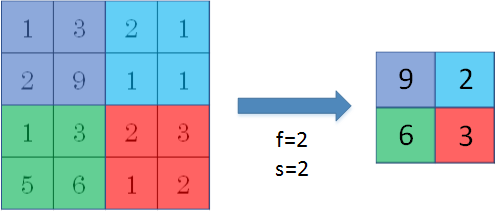

③ Max pooling的好处是只保留区域内的最大值（特征），忽略其它值，降低noise影响，提高模型健壮性。而且，max pooling需要的超参数仅为滤波器尺寸f和滤波器步进长度s，没有其他参数需要模型训练得到，计算量很小。

④ 如果是多个通道，那么就每个通道单独进行max pooling操作。

⑤ 除了max pooling之外，还有一种做法：average pooling。顾名思义，average pooling就是在滤波器算子滑动区域计算平均值。

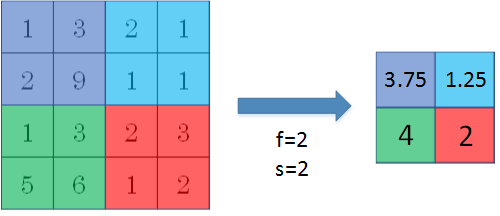

⑥ 实际应用中，max pooling比average pooling更为常用。

# 9. CNN例子

① 下面介绍一个简单的数字识别的CNN例子：

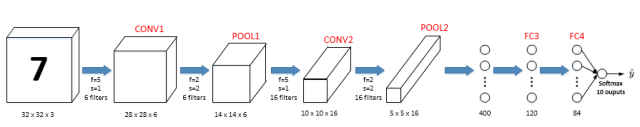

② 图中，CON层后面紧接一个POOL层，CONV1和POOL1构成第一层，CONV2和POOL2构成第二层。特别注意的是FC3和FC4为全连接层FC，它跟标准的神经网络结构一致。最后的输出层（softmax）由10个神经元构成。

③ 整个网络各层的尺寸和参数如下表格所示：

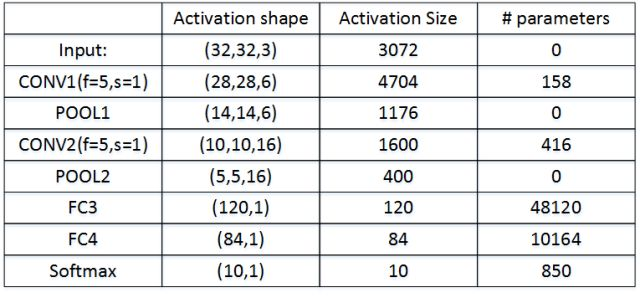

# 10. CNN优势

① 相比标准神经网络，CNN的优势之一就是参数数目要少得多。参数数目少的原因有两个：

 - 参数共享：一个特征检测器（例如垂直边缘检测）对图片某块区域有用，同时也可能作用在图片其它区域。
 - 连接的稀疏性：因为滤波器算子尺寸限制，每一层的每个输出只与输入部分区域内有关。
 
② 除此之外，由于CNN参数数目较小，所需的训练样本就相对较少，从而一定程度上不容易发生过拟合现象。

③ 而且，CNN比较擅长捕捉区域位置偏移。也就是说CNN进行物体检测时，不太受物体所处图片位置的影响，增加检测的准确性和系统的健壮性。